In [2]:
import sys
import pandas as pd
import seaborn as sns
print(sys.version)
pd.set_option('display.max_columns', 500)

3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [3]:
taiwan = pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv',parse_dates=True)

/Users/Radhika/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
taiwan.head()

time  station  AMB_TEMP  CH4    CO  NMHC   NO   NO2    O3 PH_RAIN  \
0  1/1/15 0:00  Banqiao      16.0  2.1  0.79  0.14  1.2  16.0  37.0      NR   
1  1/1/15 1:00  Banqiao      16.0  2.1  0.80  0.15  1.3  16.0  36.0      NR   
2  1/1/15 2:00  Banqiao      16.0  2.1  0.71  0.13  1.0  13.0  38.0      NR   
3  1/1/15 3:00  Banqiao      15.0  2.0  0.66  0.12  0.8  11.0  39.0      NR   
4  1/1/15 4:00  Banqiao      15.0  2.0  0.53  0.11  0.6  10.0  38.0      NR   

   PM10  PM2.5 RAINFALL RAIN_COND    RH   SO2  THC  UVB  WD_HR  WIND_DIREC  \
0   177     78       NR        NR  57.0  12.0  2.2  0.0   69.0        69.0   
1   178     77       NR        NR  57.0  11.0  2.2  0.0   67.0        65.0   
2   163     72       NR        NR  57.0   8.0  2.2  0.0   63.0        53.0   
3   147     65       NR        NR  58.0   6.5  2.2  0.0   63.0        63.0   
4   131     56       NR        NR  58.0   5.5  2.1  0.0   69.0        67.0   

   WIND_SPEED  WS_HR  
0         4.7    4.2  
1         4.0    4.0  
2         3.7    3.5  
3         4.1    3.3  
4         3.0    3.1

In [4]:
taiwan.shape

(75265, 22)

In [7]:
print(taiwan.describe())

           AMB_TEMP           CH4            CO          NMHC            NO  \
count  75265.000000  75265.000000  75265.000000  75207.000000  75265.000000   
mean      23.705845      1.913815      0.614951      0.218035      8.475661   
std        5.711377      0.166214      0.448131      0.184403     12.466963   
min       -9.600000      0.000000      0.000000     -0.810000      0.000000   
25%       19.000000      1.800000      0.340000      0.100000      1.800000   
50%       24.000000      1.900000      0.500000      0.170000      3.900000   
75%       28.000000      2.000000      0.750000      0.280000      9.900000   
max       59.000000      7.500000     34.540000      3.510000    313.000000   

                NO2            O3          PM10         PM2.5            RH  \
count  75187.000000  75265.000000  75265.000000  75265.000000  75265.000000   
mean      19.980539     26.556906     41.807015     19.315432     74.821378   
std       11.291092     17.909079     34.986772    

In [5]:
taiwan['PM2_5'] = taiwan['PM2.5']

In [6]:
print(taiwan.isnull().sum())

time              0
station           0
AMB_TEMP          0
CH4               0
CO                0
NMHC             58
NO                0
NO2              78
O3                0
PH_RAIN       66800
PM10              0
PM2.5             0
RAINFALL          0
RAIN_COND     66800
RH                0
SO2               0
THC               0
UVB           58414
WD_HR             0
WIND_DIREC        0
WIND_SPEED        0
WS_HR             1
PM2_5             0
dtype: int64


In [7]:
taiwan = taiwan.drop(['PM2.5','PH_RAIN','RAIN_COND','UVB'], axis=1)
taiwan['O3'] = taiwan['O3']/1000

In [8]:
taiwan['O3_aqi']=pd.cut(taiwan.O3,bins=[0,0.054,0.070,0.085,0.105,0.200,3],labels=[1,2,3,4,5,6])
taiwan['NO2_aqi']=pd.cut(taiwan.NO2,bins=[0,53,100,360,649,1249,2049],labels=[1,2,3,4,5,6])
taiwan['PM2_5_aqi']=pd.cut(taiwan.O3,bins=[0,12,35.4,55.4,150.4,250.4,501],labels=[1,2,3,4,5,6])
taiwan['PM10_aqi']=pd.cut(taiwan.PM10,bins=[0,54,154,254,354,424,604],labels=[1,2,3,4,5,6])
taiwan['SO2_aqi']=pd.cut(taiwan.SO2,bins=[0,35,75,185,304,604,1000],labels=[1,2,3,4,5,6])
taiwan['CO_aqi']=pd.cut(taiwan.CO,bins=[0,4.4,9.4,12.4,15.4,30.4,60],labels=[1,2,3,4,5,6])



In [9]:
taiwan['aqi'] = taiwan[['O3_aqi','NO2_aqi','PM2_5_aqi','PM10_aqi','SO2_aqi','CO_aqi']].max(axis=1)

In [10]:
taiwan['AQI'] = pd.cut(taiwan.aqi,bins=[0,1,2,3,4,5,6], labels=["GOOD","MODERATE","UNHEALTHY_SG","UNHEALTHY","VERY_UNHEALTHY","HAZARDOUS"])

In [11]:
taiwan.head()

time  station  AMB_TEMP  CH4    CO  NMHC   NO   NO2     O3  PM10  \
0  1/1/15 0:00  Banqiao      16.0  2.1  0.79  0.14  1.2  16.0  0.037   177   
1  1/1/15 1:00  Banqiao      16.0  2.1  0.80  0.15  1.3  16.0  0.036   178   
2  1/1/15 2:00  Banqiao      16.0  2.1  0.71  0.13  1.0  13.0  0.038   163   
3  1/1/15 3:00  Banqiao      15.0  2.0  0.66  0.12  0.8  11.0  0.039   147   
4  1/1/15 4:00  Banqiao      15.0  2.0  0.53  0.11  0.6  10.0  0.038   131   

  RAINFALL    RH   SO2  THC  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR  PM2_5  \
0       NR  57.0  12.0  2.2   69.0        69.0         4.7    4.2     78   
1       NR  57.0  11.0  2.2   67.0        65.0         4.0    4.0     77   
2       NR  57.0   8.0  2.2   63.0        53.0         3.7    3.5     72   
3       NR  58.0   6.5  2.2   63.0        63.0         4.1    3.3     65   
4       NR  58.0   5.5  2.1   69.0        67.0         3.0    3.1     56   

  O3_aqi NO2_aqi PM2_5_aqi PM10_aqi SO2_aqi CO_aqi  aqi           AQI  
0      1       1         1        3       1      1  3.0  UNHEALTHY_SG  
1      1       1         1        3       1      1  3.0  UNHEALTHY_SG  
2      1       1         1        3       1      1  3.0  UNHEALTHY_SG  
3      1       1         1        2       1      1  2.0      MODERATE  
4      1       1         1        2       1      1  2.0      MODERATE

In [12]:
taiwan.dtypes

time            object
station         object
AMB_TEMP       float64
CH4            float64
CO             float64
NMHC           float64
NO             float64
NO2            float64
O3             float64
PM10             int64
RAINFALL        object
RH             float64
SO2            float64
THC            float64
WD_HR          float64
WIND_DIREC     float64
WIND_SPEED     float64
WS_HR          float64
PM2_5            int64
O3_aqi        category
NO2_aqi       category
PM2_5_aqi     category
PM10_aqi      category
SO2_aqi       category
CO_aqi        category
aqi            float64
AQI           category
dtype: object

In [13]:
 tai_grp = taiwan.groupby(['station','aqi']).mean().apply(list)

In [14]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
cosine_similarity( tai_grp)

array([[ 1.        ,  0.98663679,  0.98110197, ...,  0.96410401,
         0.97422768,  0.96891733],
       [ 0.98663679,  1.        ,  0.98971479, ...,  0.99374534,
         0.99404359,  0.9743332 ],
       [ 0.98110197,  0.98971479,  1.        , ...,  0.98539441,
         0.99531328,  0.99571311],
       ..., 
       [ 0.96410401,  0.99374534,  0.98539441, ...,  1.        ,
         0.99516417,  0.9699218 ],
       [ 0.97422768,  0.99404359,  0.99531328, ...,  0.99516417,
         1.        ,  0.98726221],
       [ 0.96891733,  0.9743332 ,  0.99571311, ...,  0.9699218 ,
         0.98726221,  1.        ]])

In [15]:
euclidean_distances(tai_grp)

array([[   0.        ,   59.09004258,  115.06158211, ...,  110.3254521 ,
         121.23453016,  233.56179792],
       [  59.09004258,    0.        ,   71.24839769, ...,   52.34859898,
          68.36515512,  191.44644356],
       [ 115.06158211,   71.24839769,    0.        , ...,   54.95261268,
          30.75434354,  122.3930708 ],
       ..., 
       [ 110.3254521 ,   52.34859898,   54.95261268, ...,    0.        ,
          35.61098303,  160.2349437 ],
       [ 121.23453016,   68.36515512,   30.75434354, ...,   35.61098303,
           0.        ,  129.40516023],
       [ 233.56179792,  191.44644356,  122.3930708 , ...,  160.2349437 ,
         129.40516023,    0.        ]])

In [16]:
tai_grp.index

MultiIndex(levels=[['Banqiao', 'Guting', 'Keelung', 'Songshan', 'Taoyuan', 'Tucheng', 'Yonghe', 'Zhongli', 'Zhongshan'], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['station', 'aqi'])

In [56]:
tai_grp

AMB_TEMP       CH4         CO      NMHC          NO  \
station   aqi                                                         
Banqiao   1.0  24.401271  1.955246   0.521031  0.216674    5.514532   
          2.0  22.821561  2.054600   0.757151  0.335116    8.304833   
          3.0  29.766667  1.910667   0.516667  0.217230    3.403333   
          4.0  31.382353  1.963235   0.551029  0.226471    1.942647   
          5.0  31.952381  1.995238   0.706190  0.287619    1.609524   
Guting    1.0  23.696857  1.923023   0.479224  0.140462    5.990781   
          2.0  23.070258  1.974848   0.653302  0.199372    6.389274   
          3.0  29.614035  1.953509   0.574474  0.187807    2.052632   
          4.0  32.153846  1.946154   0.631923  0.225385    1.773077   
          5.0  34.000000  1.928571   0.681429  0.228571    1.742857   
Keelung   1.0  23.234764  1.785672   0.357663  0.120581    3.261392   
          2.0  22.150721  1.796126   0.401541  0.101262    2.178559   
          3.0  27.015873  1.727778   0.329048  0.084640    1.260317   
          4.0  28.157895  1.721053   0.355263  0.111579    1.400000   
          5.0  27.000000  1.700000   0.540000  0.180000    0.800000   
          6.0  33.000000  1.600000  34.540000  0.050000  313.000000   
Songshan  1.0  23.661235  1.840122   0.481970  0.161238    7.482637   
          2.0  22.231830  1.871665   0.620108  0.186514    7.555909   
          3.0  28.486842  1.811184   0.486645  0.140395    2.646711   
          4.0  31.539683  1.793651   0.515873  0.153492    2.349206   
          5.0  31.823529  1.841176   0.657059  0.205882    2.570588   
Taoyuan   1.0  23.736204  1.916395   0.444555  0.162398    3.795365   
          2.0  21.559716  1.991761   0.654773  0.243832    5.655057   
          3.0  28.177305  1.929787   0.448652  0.150213    1.807092   
          4.0  30.931034  1.931034   0.501724  0.196207    1.696552   
          5.0  31.166667  1.983333   0.563333  0.190000    1.533333   
Tucheng   1.0  23.856272  1.862112   0.446470  0.170553    5.034656   
          2.0  22.581867  1.940267   0.685179  0.280571    9.462933   
          3.0  29.461078  1.854491   0.467485  0.184790    2.257485   
          4.0  31.534091  1.867045   0.488182  0.209886    1.661364   
          5.0  32.178571  1.903571   0.595000  0.228929    1.525000   
Yonghe    1.0  24.050563  1.872246   0.757225  0.253613   11.727242   
          2.0  22.533898  1.969035   1.163501  0.405430   18.154302   
          3.0  27.812500  1.870000   0.846125  0.289625    5.020000   
          4.0  32.736842  1.878947   1.217895  0.427895    5.268421   
          5.0  34.000000  1.850000   1.125000  0.375000    3.150000   
Zhongli   1.0  24.344295  2.004027   0.926044  0.351728   18.285353   
          2.0  22.255450  2.080657   1.201612  0.464311   21.812128   
          3.0  20.750000  2.136842   1.364079  0.556316   23.213158   
          4.0  31.000000  2.042857   0.832857  0.308571    3.685714   
          5.0  30.000000  2.100000   0.890000  0.430000    3.100000   
Zhongshan 1.0  24.996389  1.913272   0.627979  0.199763   10.137559   
          2.0  22.515813  2.008864   0.860633  0.273067   14.225078   
          3.0  26.214286  1.922449   0.690102  0.192143    4.133673   
          4.0  32.571429  1.914286   0.777143  0.252143    3.257143   
          5.0  34.500000  1.900000   0.720000  0.210000    2.200000   

                     NO2        O3        PM10         RH         SO2  \
station   aqi                                                           
Banqiao   1.0  20.496898  0.022923   33.476865  72.572499    3.242799   
          2.0  26.873933  0.029542   72.141729  68.164963    4.899814   
          3.0  18.371429  0.075066   66.360000  53.700000    4.604667   
          4.0  19.611940  0.093397   65.117647  52.250000    5.100000   
          5.0  22.904762  0.117429   76.000000  53.761905    4.761905   
Guting    1.0  17.498298  0.022134   34.825178  80.715489    2.350745   
          2.0  24.30950

In [17]:
tai_2 = tai_grp.reset_index()

In [18]:
tai_2

station  aqi   AMB_TEMP       CH4         CO      NMHC          NO  \
0     Banqiao  1.0  24.401271  1.955246   0.521031  0.216674    5.514532   
1     Banqiao  2.0  22.821561  2.054600   0.757151  0.335116    8.304833   
2     Banqiao  3.0  29.766667  1.910667   0.516667  0.217230    3.403333   
3     Banqiao  4.0  31.382353  1.963235   0.551029  0.226471    1.942647   
4     Banqiao  5.0  31.952381  1.995238   0.706190  0.287619    1.609524   
5      Guting  1.0  23.696857  1.923023   0.479224  0.140462    5.990781   
6      Guting  2.0  23.070258  1.974848   0.653302  0.199372    6.389274   
7      Guting  3.0  29.614035  1.953509   0.574474  0.187807    2.052632   
8      Guting  4.0  32.153846  1.946154   0.631923  0.225385    1.773077   
9      Guting  5.0  34.000000  1.928571   0.681429  0.228571    1.742857   
10    Keelung  1.0  23.234764  1.785672   0.357663  0.120581    3.261392   
11    Keelung  2.0  22.150721  1.796126   0.401541  0.101262    2.178559   
12    Keelung  3.0  27.015873  1.727778   0.329048  0.084640    1.260317   
13    Keelung  4.0  28.157895  1.721053   0.355263  0.111579    1.400000   
14    Keelung  5.0  27.000000  1.700000   0.540000  0.180000    0.800000   
15    Keelung  6.0  33.000000  1.600000  34.540000  0.050000  313.000000   
16   Songshan  1.0  23.661235  1.840122   0.481970  0.161238    7.482637   
17   Songshan  2.0  22.231830  1.871665   0.620108  0.186514    7.555909   
18   Songshan  3.0  28.486842  1.811184   0.486645  0.140395    2.646711   
19   Songshan  4.0  31.539683  1.793651   0.515873  0.153492    2.349206   
20   Songshan  5.0  31.823529  1.841176   0.657059  0.205882    2.570588   
21    Taoyuan  1.0  23.736204  1.916395   0.444555  0.162398    3.795365   
22    Taoyuan  2.0  21.559716  1.991761   0.654773  0.243832    5.655057   
23    Taoyuan  3.0  28.177305  1.929787   0.448652  0.150213    1.807092   
24    Taoyuan  4.0  30.931034  1.931034   0.501724  0.196207    1.696552   
25    Taoyuan  5.0  31.166667  1.983333   0.563333  0.190000    1.533333   
26    Tucheng  1.0  23.856272  1.862112   0.446470  0.170553    5.034656   
27    Tucheng  2.0  22.581867  1.940267   0.685179  0.280571    9.462933   
28    Tucheng  3.0  29.461078  1.854491   0.467485  0.184790    2.257485   
29    Tucheng  4.0  31.534091  1.867045   0.488182  0.209886    1.661364   
30    Tucheng  5.0  32.178571  1.903571   0.595000  0.228929    1.525000   
31     Yonghe  1.0  24.050563  1.872246   0.757225  0.253613   11.727242   
32     Yonghe  2.0  22.533898  1.969035   1.163501  0.405430   18.154302   
33     Yonghe  3.0  27.812500  1.870000   0.846125  0.289625    5.020000   
34     Yonghe  4.0  32.736842  1.878947   1.217895  0.427895    5.268421   
35     Yonghe  5.0  34.000000  1.850000   1.125000  0.375000    3.150000   
36    Zhongli  1.0  24.344295  2.004027   0.926044  0.351728   18.285353   
37    Zhongli  2.0  22.255450  2.080657   1.201612  0.464311   21.812128   
38    Zhongli  3.0  20.750000  2.136842   1.364079  0.556316   23.213158   
39    Zhongli  4.0  31.000000  2.042857   0.832857  0.308571    3.685714   
40    Zhongli  5.0  30.000000  2.100000   0.890000  0.430000    3.100000   
41  Zhongshan  1.0  24.996389  1.913272   0.627979  0.199763   10.137559   
42  Zhongshan  2.0  22.515813  2.008864   0.860633  0.273067   14.225078   
43  Zhongshan  3.0  26.214286  1.922449   0.690102  0.192143    4.133673   
44  Zhongshan  4.0  32.571429  1.914286   0.777143  0.252143    3.257143   
45  Zhongshan  5.0  34.500000  1.900000   0.720000  0.210000    2.200000   

          NO2        O3        PM10         RH         SO2       THC  \
0   20.496898  0.022923   33.476865  72.572499    3.242799  2.170935   
1   26.873933  0.029542   72.141729  68.164963    4.899814  2.388290   
2   18.371429  0.075066   66.360000  53.700000    4.604667  2.125333   
3   19.611940  0.093397   65.117647  52.250000    5.100000  2.189706   
4   22.904762  0.117429   76.000000  53.761905    4.761905  2.285714   
5

In [19]:
tai_2['AQI_cal'] = pd.cut(tai_2.aqi,bins=[0,1.1,2.1,3.1,4.1,5.1,6.1], labels=["GOOD","MODERATE","UNHEALTHY_SG","UNHEALTHY","VERY_UNHEALTHY","HAZARDOUS"])

In [20]:
tai_Banqiao = tai_2[tai_2['station'] =='Banqiao'] 

In [21]:
tai_2.tail()

station  aqi   AMB_TEMP       CH4        CO      NMHC         NO  \
41  Zhongshan  1.0  24.996389  1.913272  0.627979  0.199763  10.137559   
42  Zhongshan  2.0  22.515813  2.008864  0.860633  0.273067  14.225078   
43  Zhongshan  3.0  26.214286  1.922449  0.690102  0.192143   4.133673   
44  Zhongshan  4.0  32.571429  1.914286  0.777143  0.252143   3.257143   
45  Zhongshan  5.0  34.500000  1.900000  0.720000  0.210000   2.200000   

          NO2        O3        PM10         RH       SO2       THC  \
41  22.638155  0.020573   34.791802  75.802095  2.979198  2.112098   
42  31.116852  0.027200   78.181292  69.323831  4.247617  2.280223   
43  25.282292  0.065265  106.255102  57.918367  4.612245  2.114286   
44  29.285714  0.092786   85.142857  55.571429  4.621429  2.178571   
45  27.000000  0.111500   65.500000  50.000000  5.450000  2.100000   

         WD_HR  WIND_DIREC  WIND_SPEED     WS_HR      PM2_5         AQI_cal  
41  154.662062  155.699765    2.097833  1.647436  13.171000            GOOD  
42  172.556080  168.031136    2.046459  1.437416  32.440535        MODERATE  
43  196.296939  180.995918    2.443878  1.436735  47.010204    UNHEALTHY_SG  
44  220.150000  194.685714    2.078571  0.921429  48.714286       UNHEALTHY  
45  314.500000  280.000000    1.850000  0.350000  37.000000  VERY_UNHEALTHY

In [22]:
tai_2.dtypes

station         object
aqi            float64
AMB_TEMP       float64
CH4            float64
CO             float64
NMHC           float64
NO             float64
NO2            float64
O3             float64
PM10           float64
RH             float64
SO2            float64
THC            float64
WD_HR          float64
WIND_DIREC     float64
WIND_SPEED     float64
WS_HR          float64
PM2_5          float64
AQI_cal       category
dtype: object

In [23]:
tai_2['station'] = tai_2['station'].astype('category')

/Users/Radhika/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


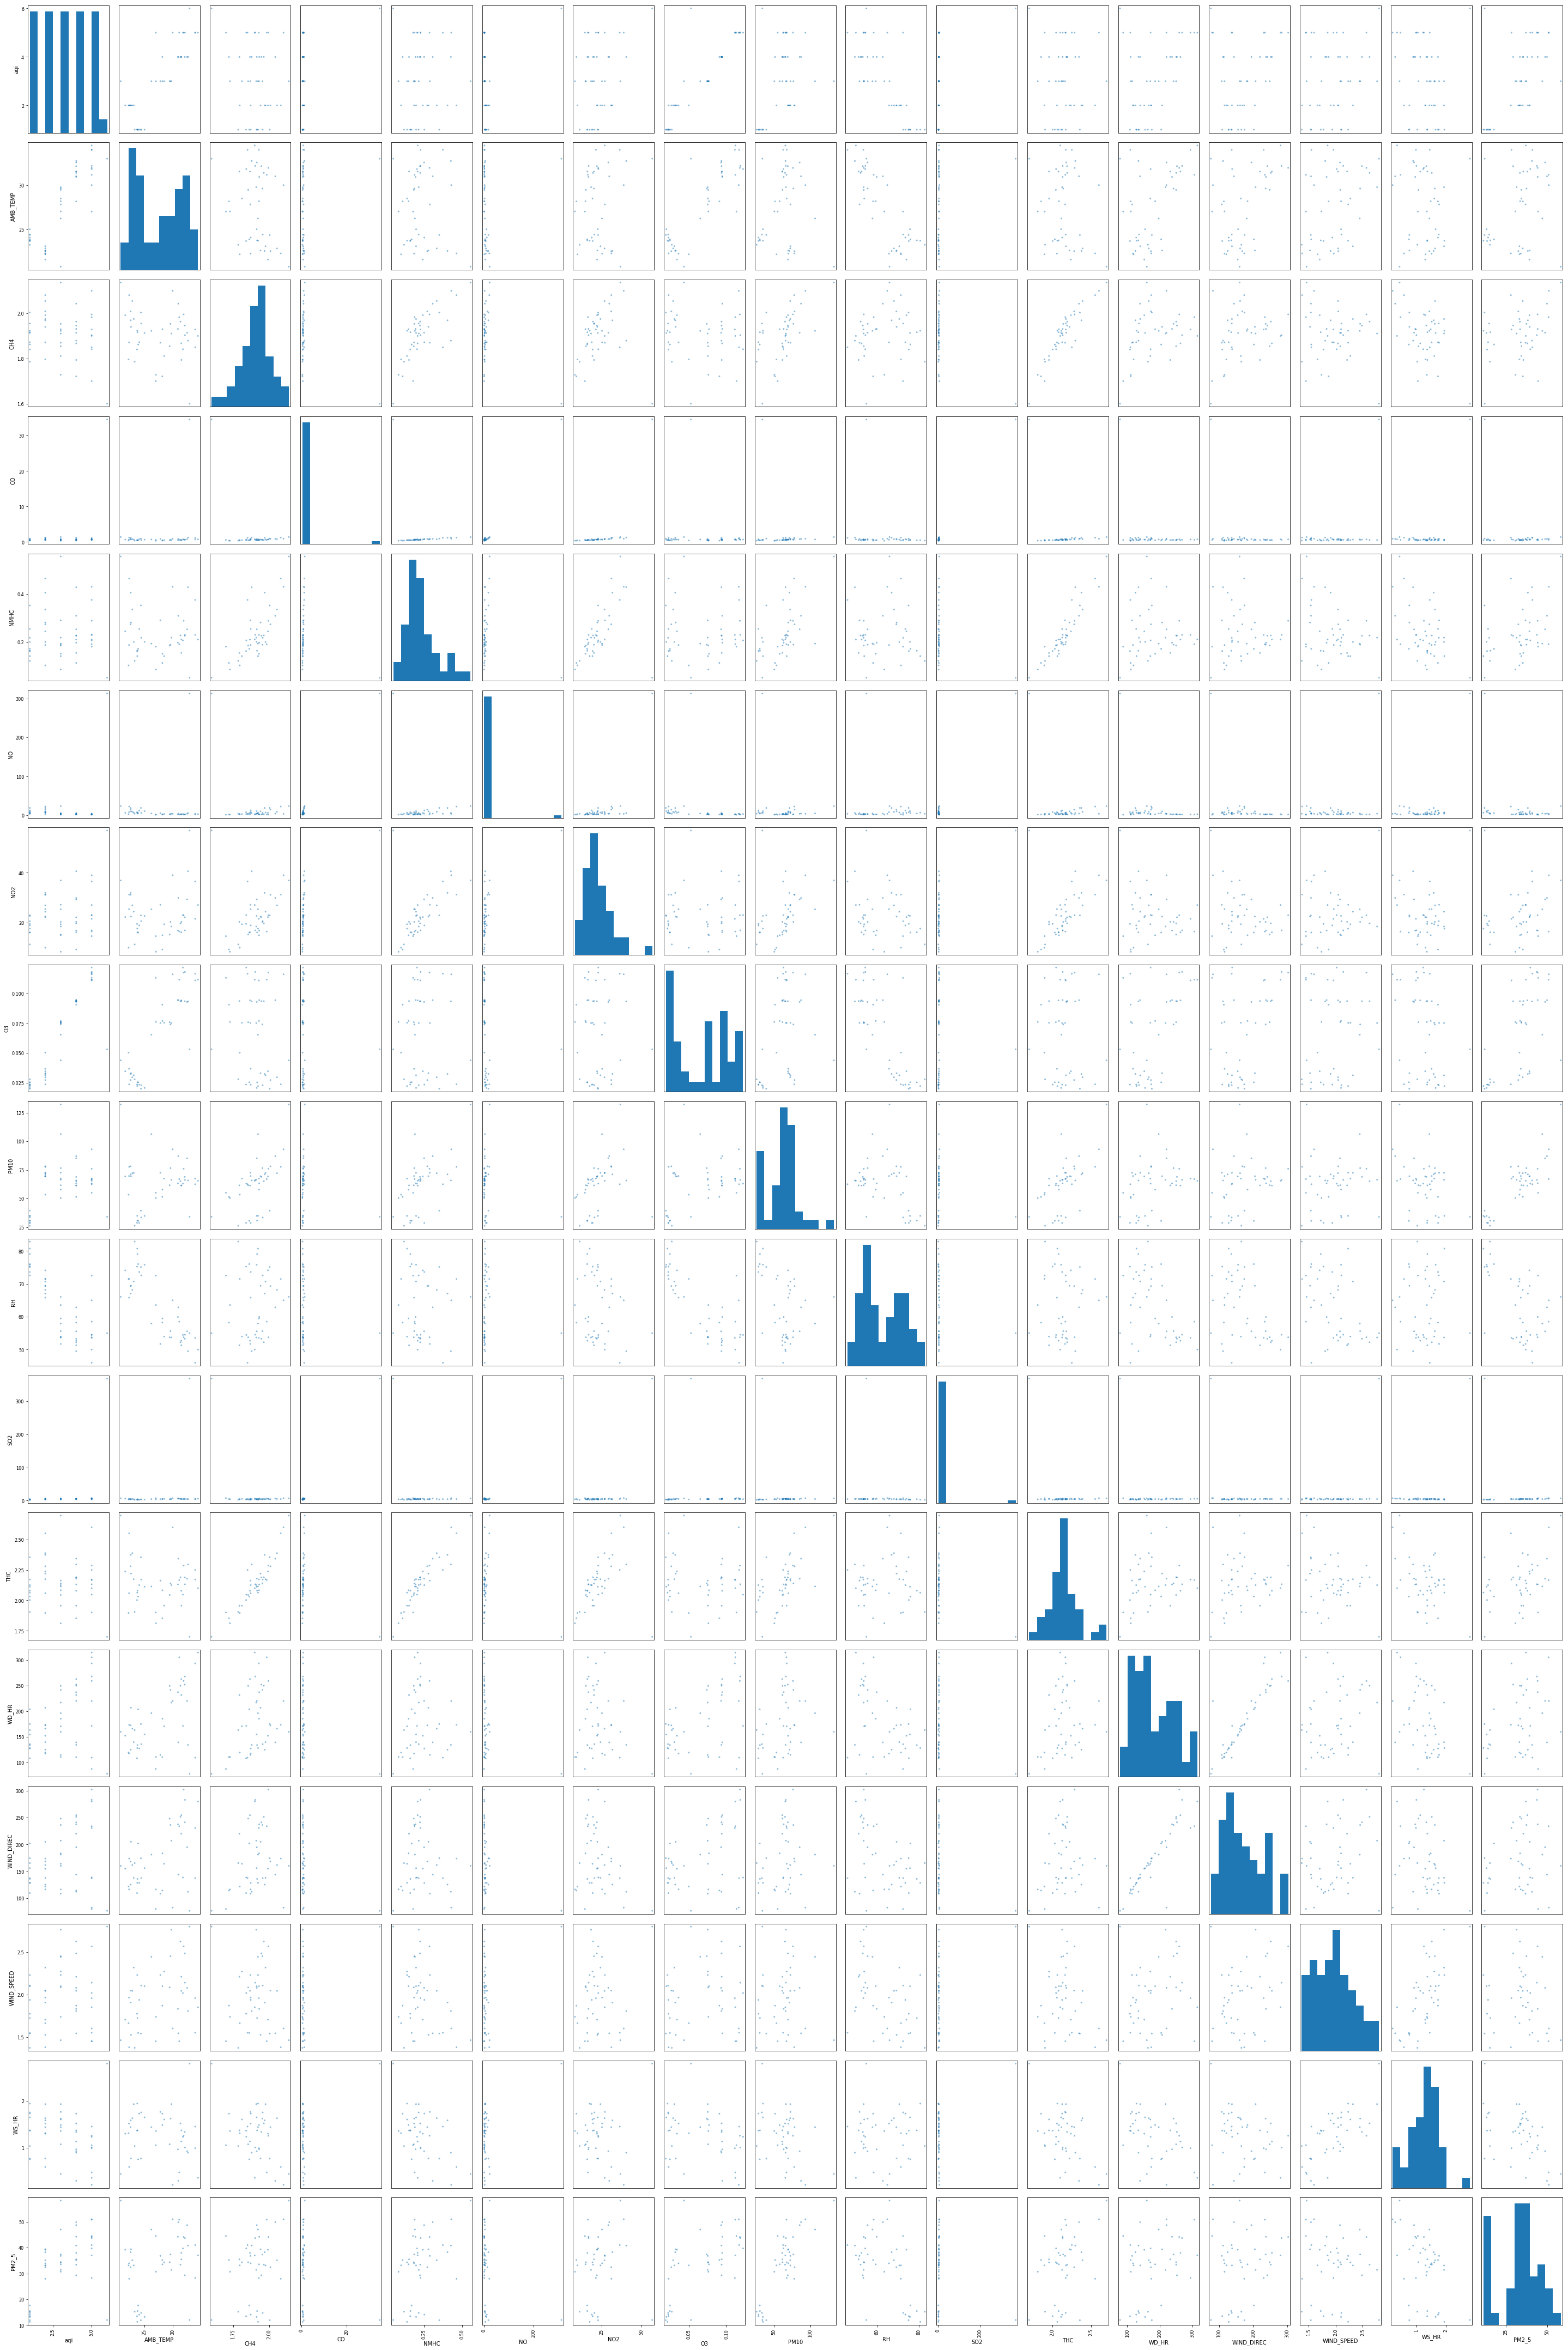

In [24]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
pd.tools.plotting.scatter_matrix(tai_2,figsize=[40,60])
plt.tight_layout()
plt.show()

In [33]:

tai_2_sns = tai_2.drop('AQI_cal', 1)
tai_2_sns.drop('station', axis=1, inplace=True)

In [34]:
tai_2_sns = tai_2_sns.reset_index()

In [35]:
tai_2_sns.head()

index  aqi   AMB_TEMP       CH4        CO      NMHC        NO        NO2  \
0      0  1.0  24.401271  1.955246  0.521031  0.216674  5.514532  20.496898   
1      1  2.0  22.821561  2.054600  0.757151  0.335116  8.304833  26.873933   
2      2  3.0  29.766667  1.910667  0.516667  0.217230  3.403333  18.371429   
3      3  4.0  31.382353  1.963235  0.551029  0.226471  1.942647  19.611940   
4      4  5.0  31.952381  1.995238  0.706190  0.287619  1.609524  22.904762   

         O3       PM10         RH       SO2       THC       WD_HR  WIND_DIREC  \
0  0.022923  33.476865  72.572499  3.242799  2.170935  135.801369  137.085354   
1  0.029542  72.141729  68.164963  4.899814  2.388290  166.002416  161.480623   
2  0.075066  66.360000  53.700000  4.604667  2.125333  217.030667  206.982667   
3  0.093397  65.117647  52.250000  5.100000  2.189706  249.797059  251.457353   
4  0.117429  76.000000  53.761905  4.761905  2.285714  259.138095  302.380952   

   WIND_SPEED     WS_HR      PM2_5  
0    2.105148  1.752916  14.726784  
1    2.042612  1.629507  35.126859  
2    2.763333  1.931333  31.393333  
3    2.625000  1.519118  33.426471  
4    2.566667  1.252381  44.142857

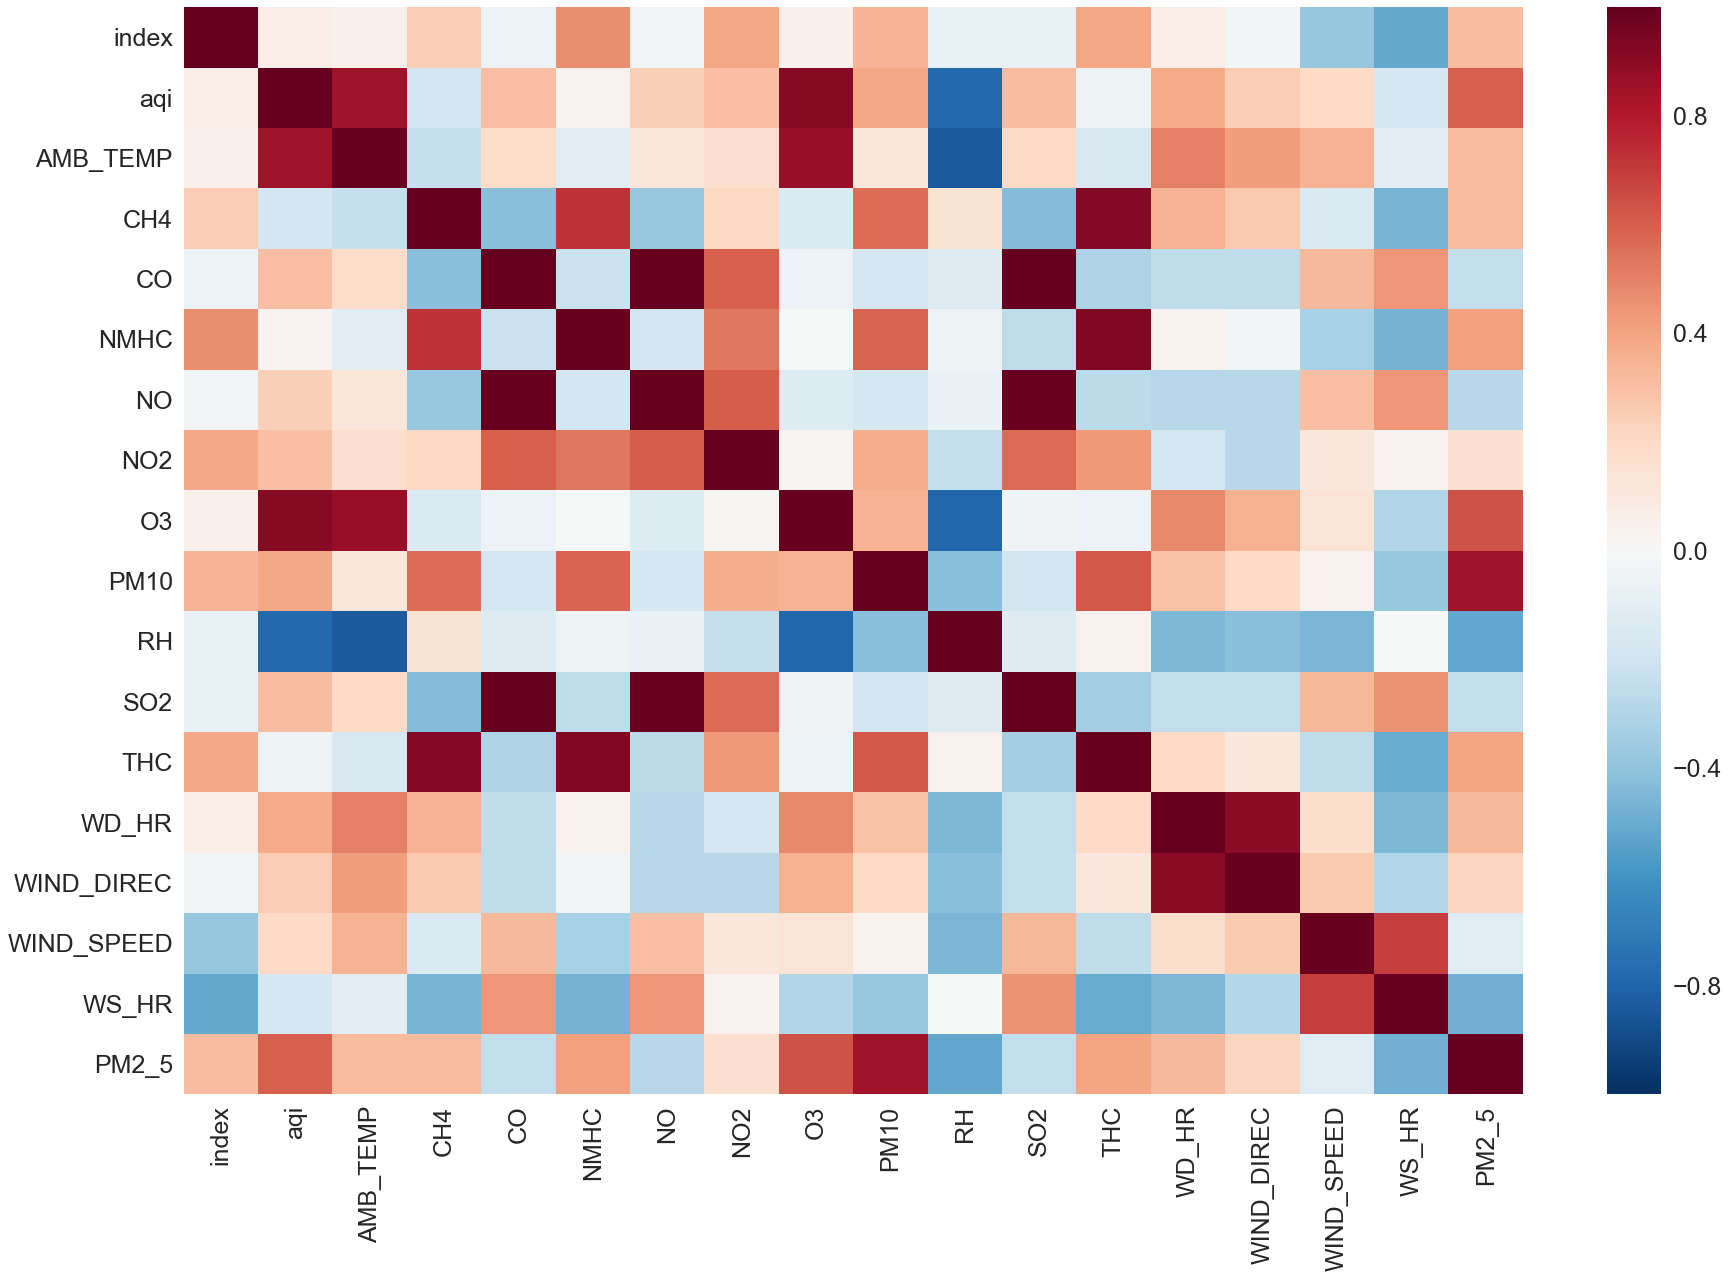

In [78]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
sns.set_context("poster")
tai_2_sns.apply(np.mean)
tai_2_sns.apply(np.std)
plt.figure(figsize=(30,20))
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
corr_matrix = tai_2_sns.corr()
sns.heatmap(corr_matrix, vmax=1.).xaxis.tick_bottom()

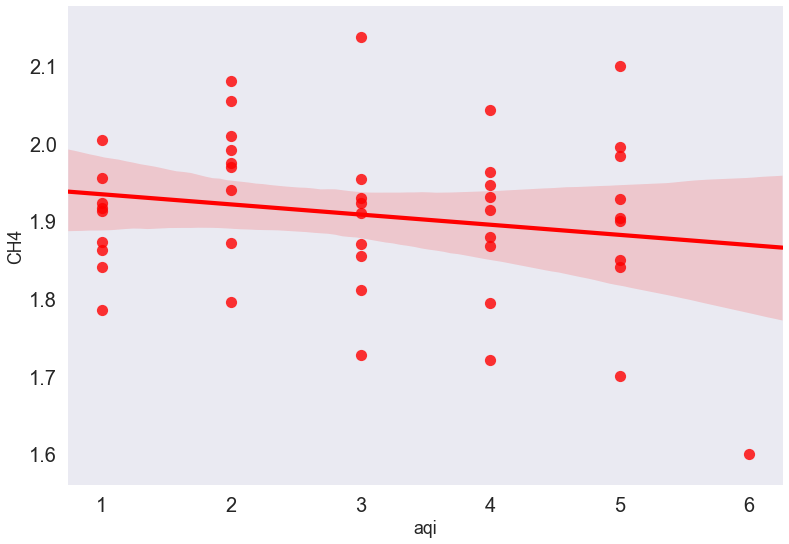

In [37]:
sns.regplot(x = 'aqi', y = 'CH4', data = tai_2, color = 'Red')

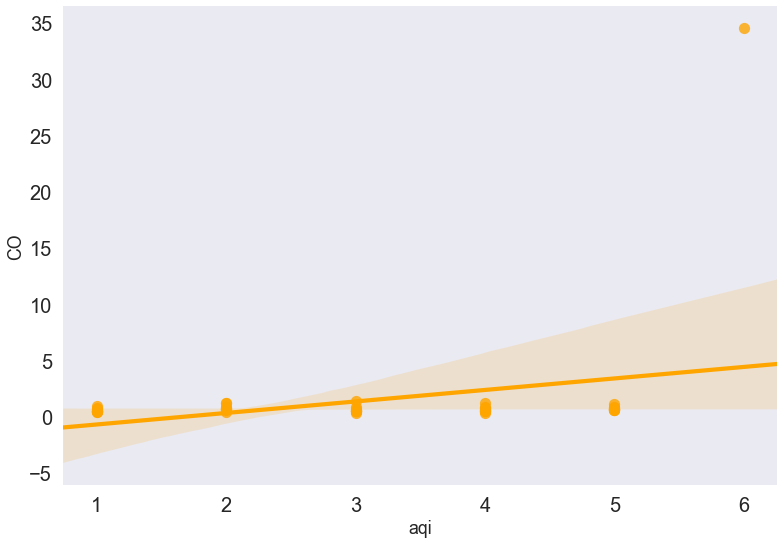

In [38]:
sns.regplot(x = 'aqi', y = 'CO', data = tai_2, color = 'Orange')

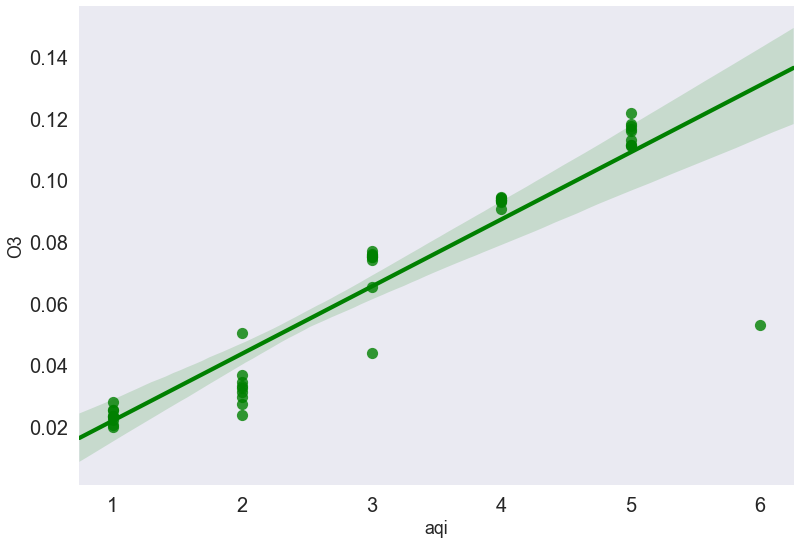

In [138]:
sns.regplot(x = 'aqi', y = 'O3', data = tai_2, color = 'Green')

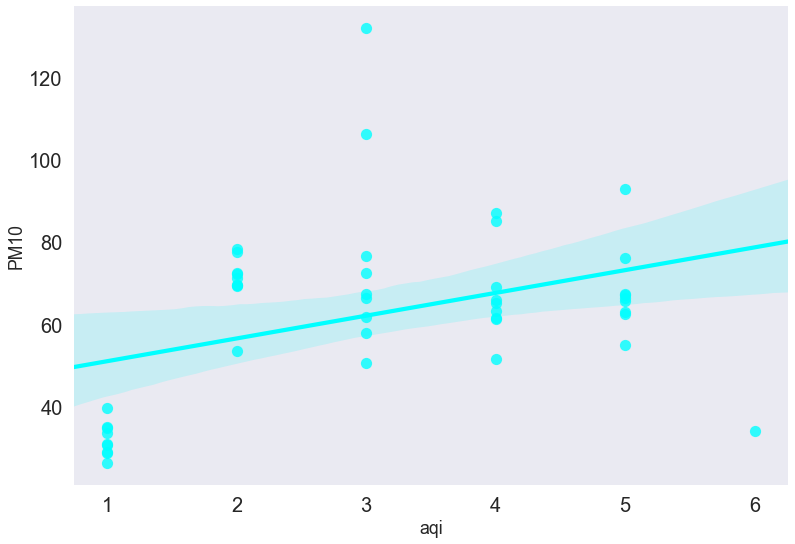

In [140]:
sns.regplot(x = 'aqi', y = 'PM10', data = tai_2, color = 'Cyan')

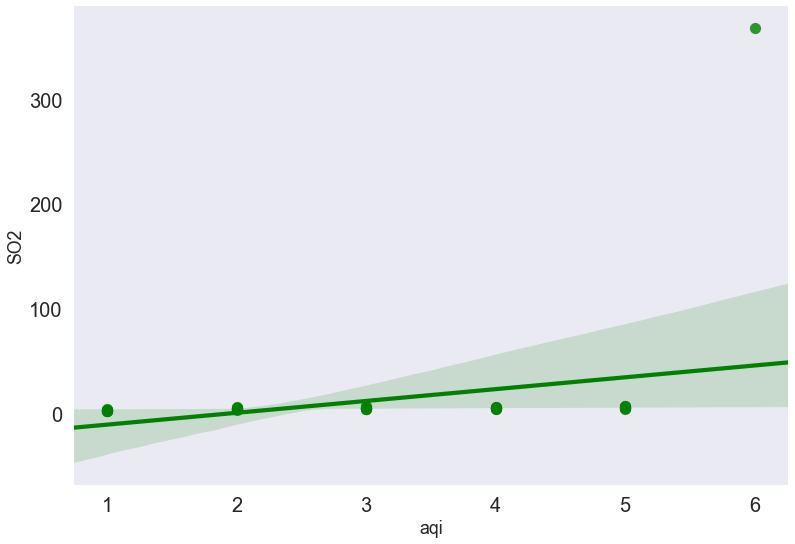

In [142]:
sns.regplot(x = 'aqi', y = 'SO2', data = tai_2, color = 'Green')

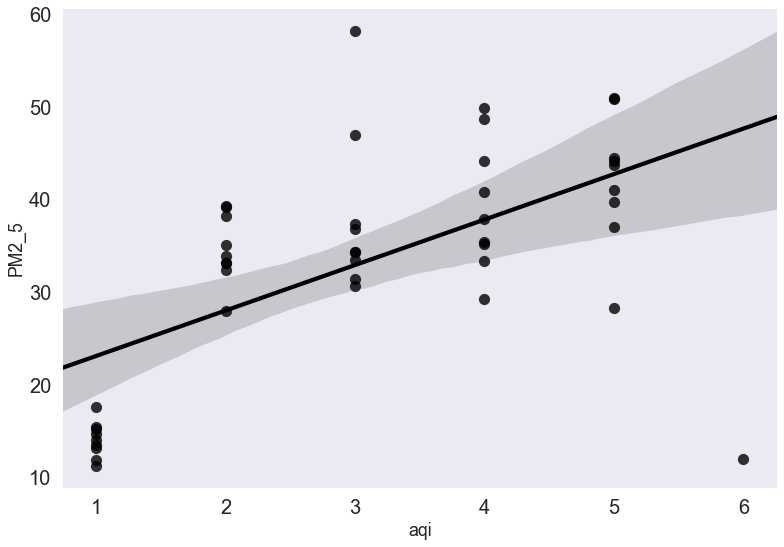

In [144]:
sns.regplot(x = 'aqi', y = 'PM2_5', data = tai_2, color = 'Black')

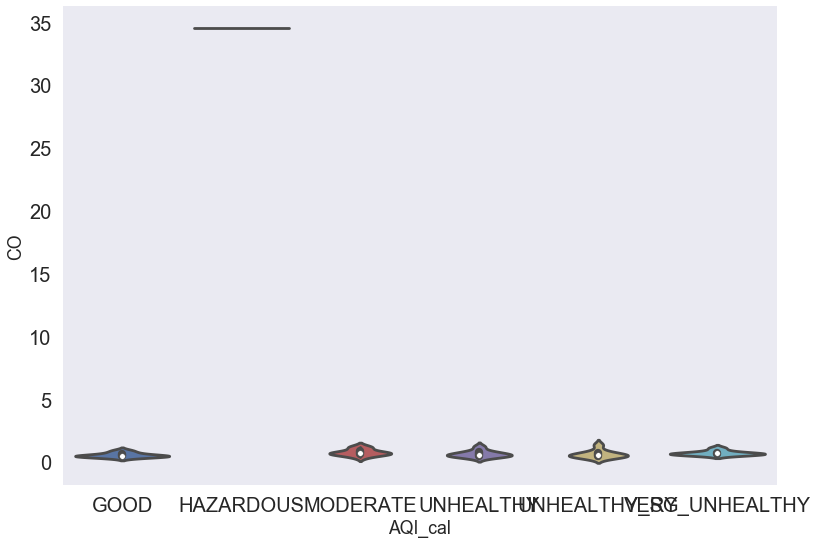

In [39]:
sns.violinplot('AQI_cal','CO', data=tai_2)

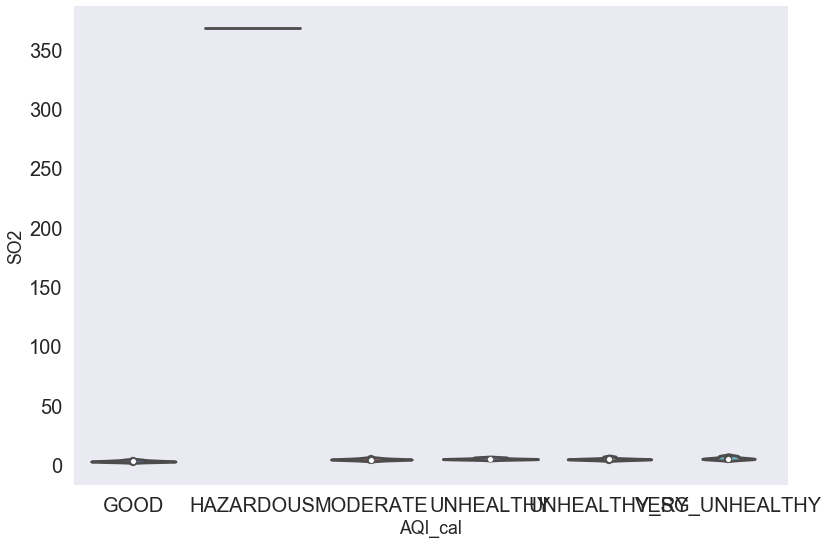

In [40]:
sns.violinplot('AQI_cal','SO2', data=tai_2)

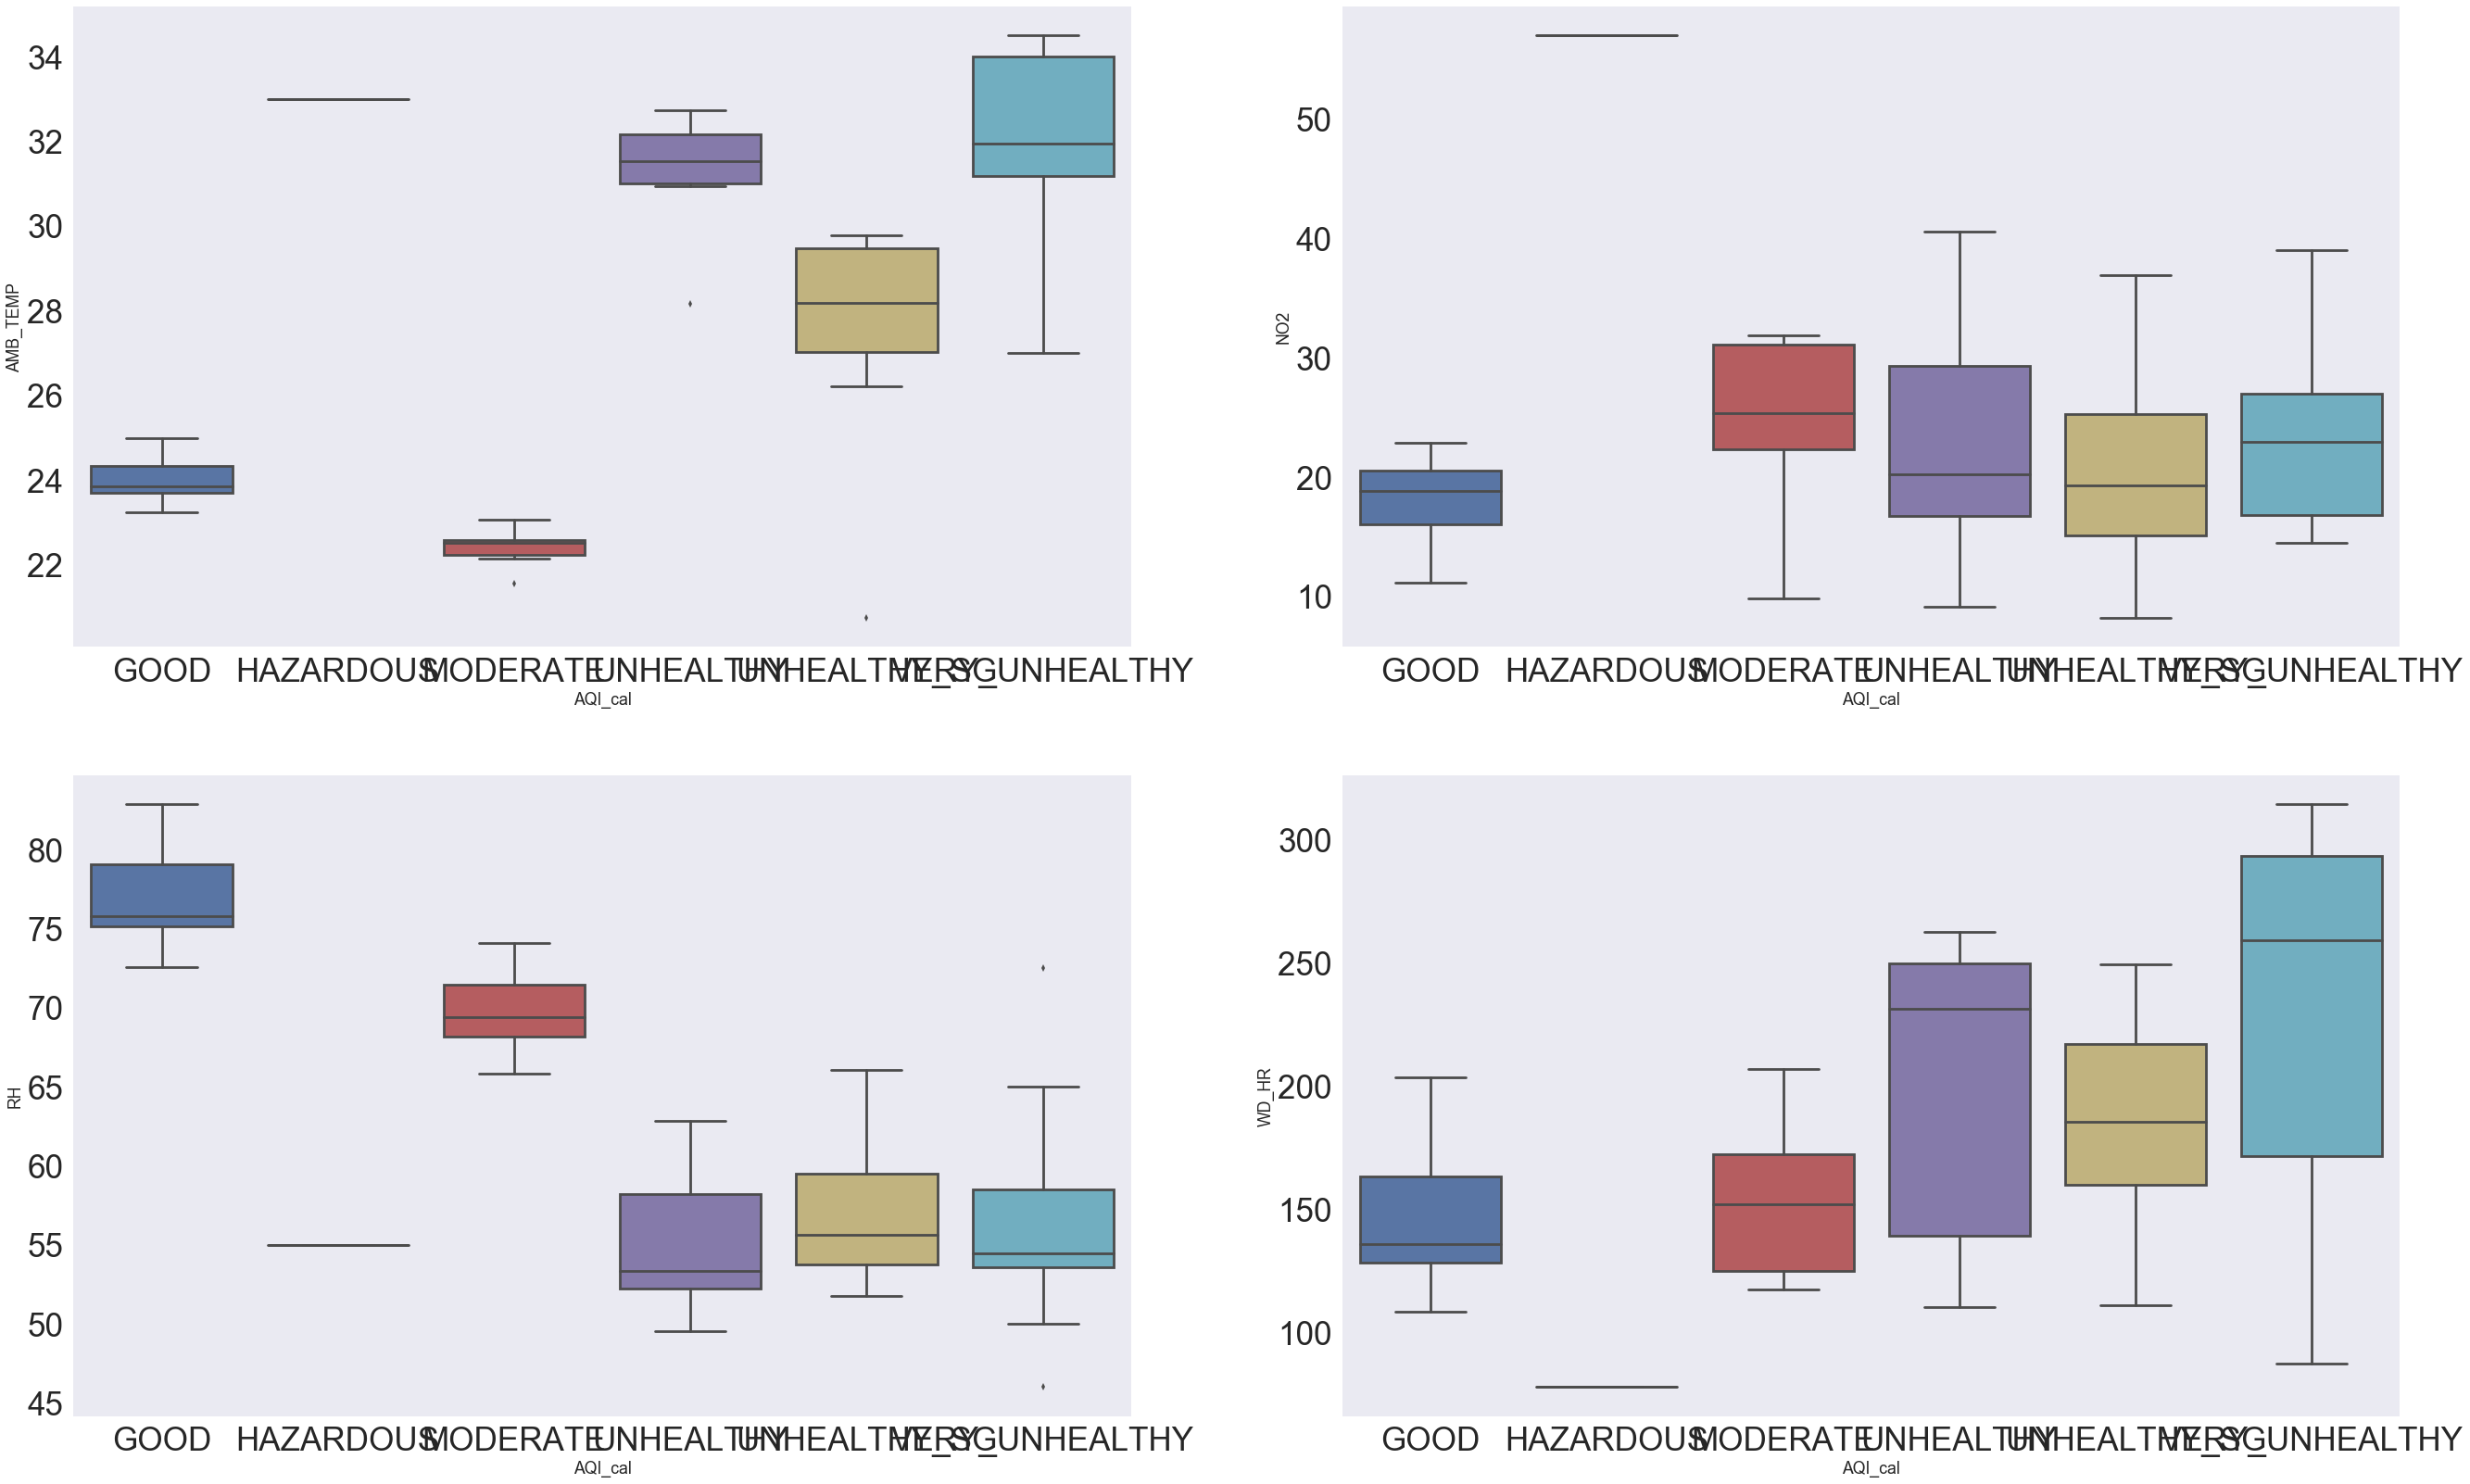

In [76]:
fig, ax = plt.subplots(2, 2, figsize = (45, 28))
sns.boxplot('AQI_cal', 'AMB_TEMP', data = tai_2, ax = ax[0, 0])
sns.boxplot('AQI_cal','NO2', data = tai_2, ax = ax[0, 1])
sns.boxplot('AQI_cal','RH', data = tai_2, ax = ax[1, 0])
sns.boxplot('AQI_cal','WD_HR', data = tai_2, ax = ax[1, 1])



/Users/Radhika/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


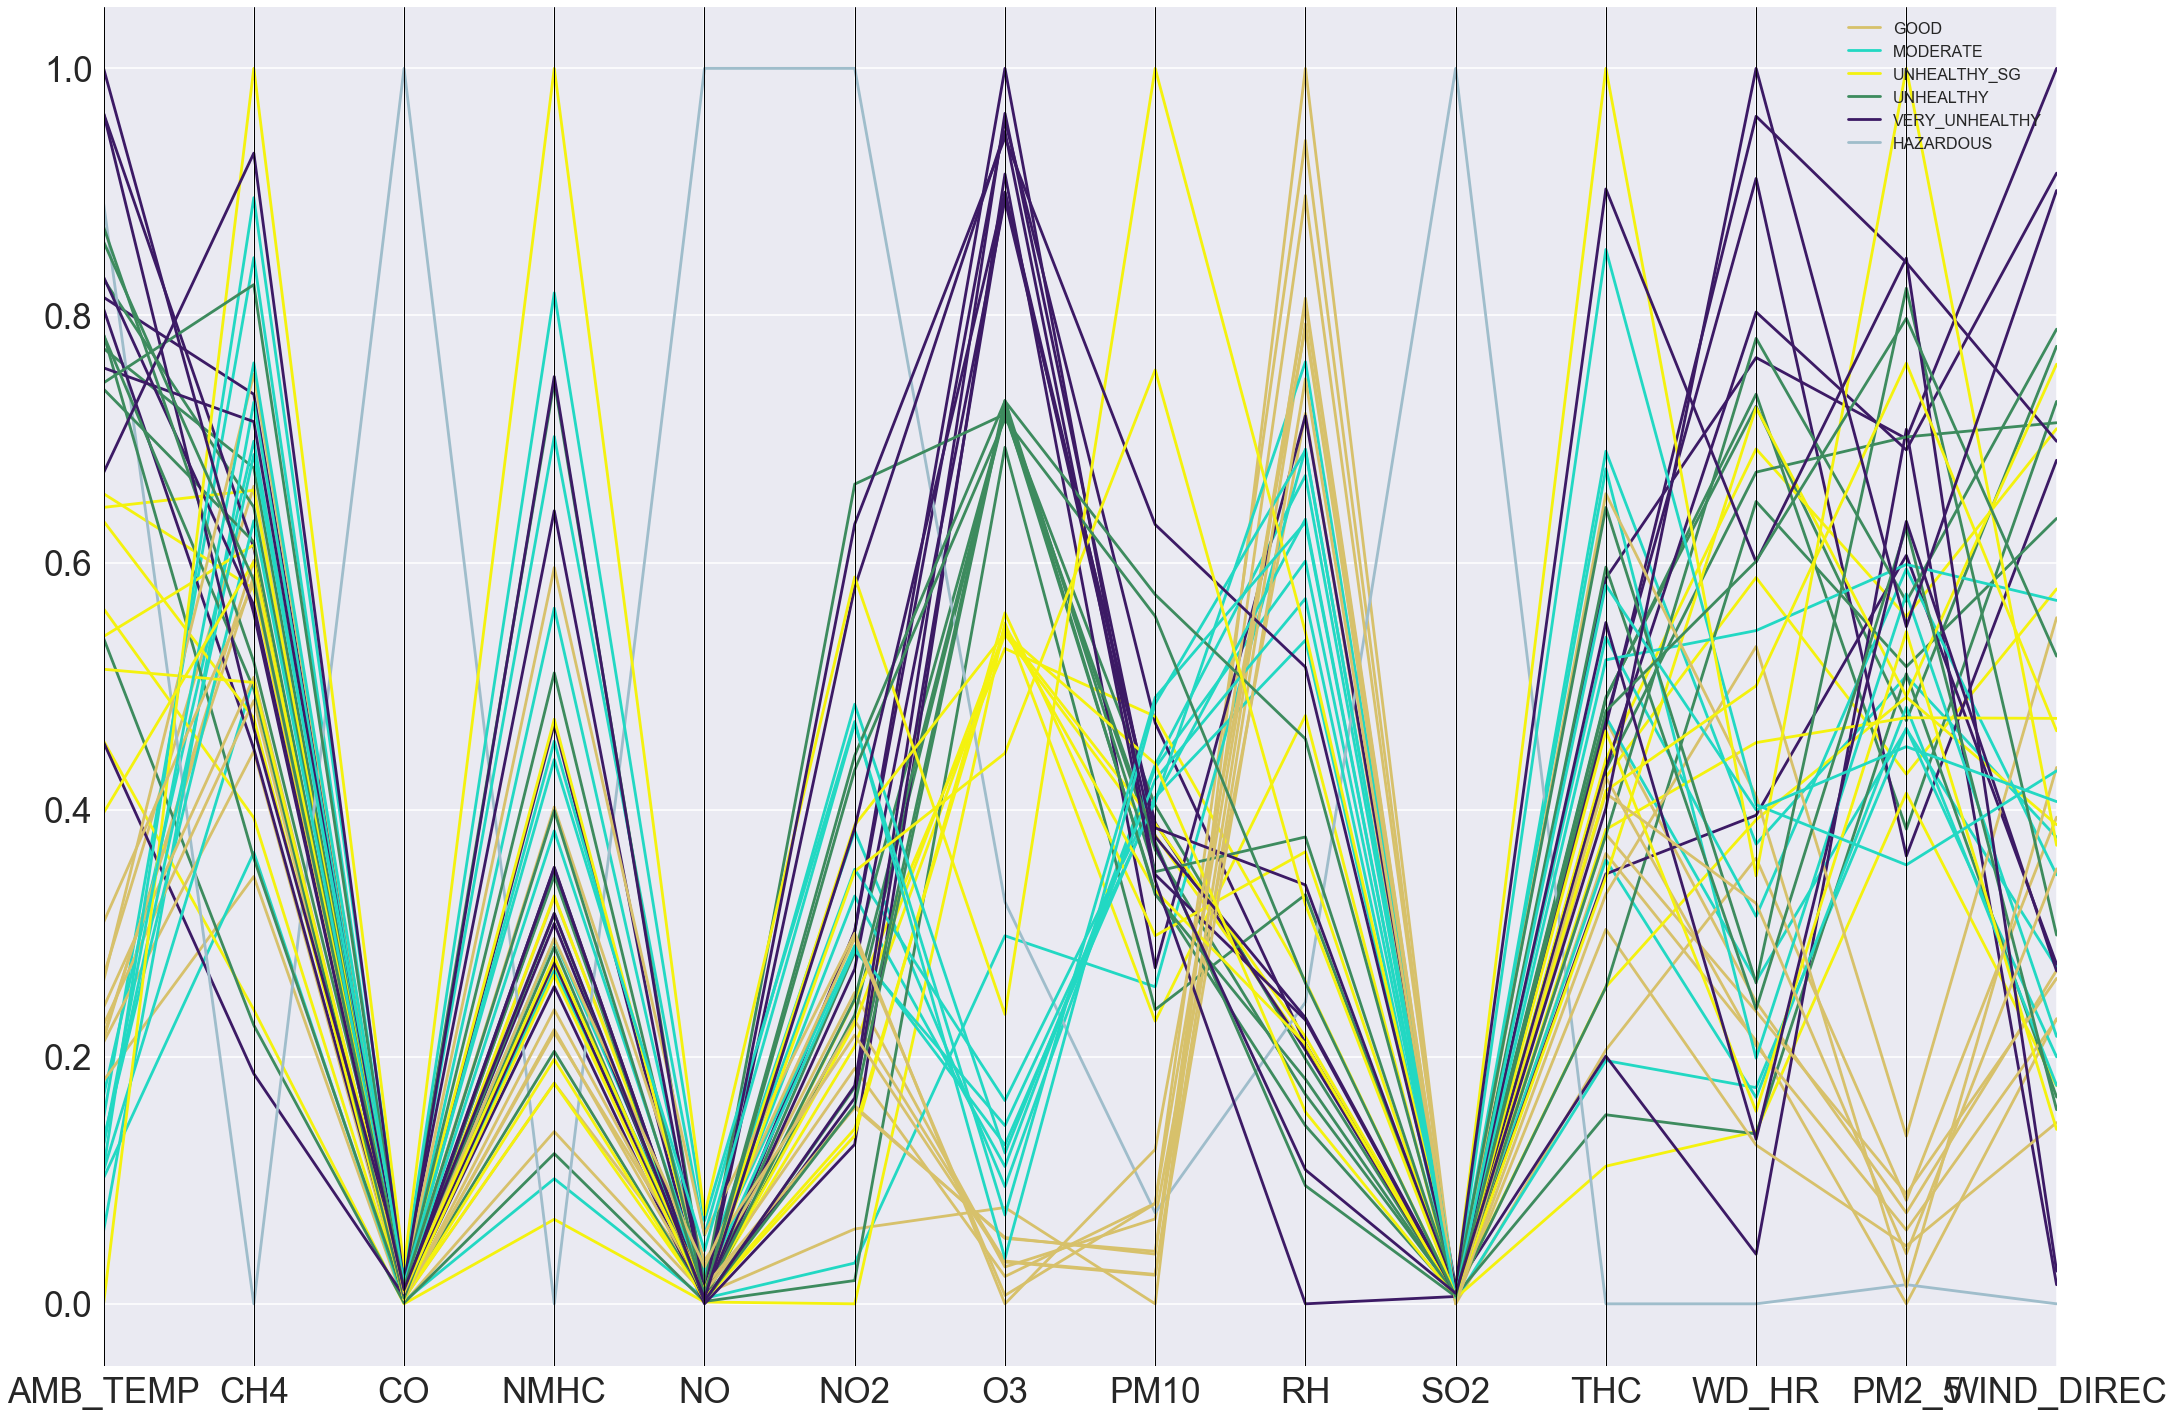

In [54]:
from pandas.tools.plotting import parallel_coordinates
import matplotlib.pylab as plt

#Importing Parallel coordinated plots to see if there is a general trend as indiated by visualizing parameters till now

plt.figure(figsize=(35,25))
plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35) 
#print(result_random_lean)
Y = tai_2['AQI_cal']
X = tai_2.filter(['AMB_TEMP', 'CH4', 'CO','NMHC','NO','NO2','O3','PM10','RH','SO2','THC','WD_HR','PM2_5','WIND_DIREC'], axis=1)

Features = ['AMB_TEMP', 'CH4', 'CO','NMHC','NO','NO2','O3','PM10','RH','SO2','THC','WD_HR','PM2_5','WIND_DIREC']

#Selecting parameters

X_norm = (X - X.min())/(X.max() - X.min())

data_norm = pd.concat([X_norm[Features], Y], axis=1)

#Normalizing data as we are plotting them against each other, so scaling is a important

parallel_coordinates(data_norm, 'AQI_cal')
plt.show()

In [56]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y,
     test_size=0.30, random_state=123)

/Users/Radhika/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2) 

from sklearn import metrics
lda_clf = LDA()
lda_clf.fit(X_train, Y_train)
LDA(n_components=None, priors=None)
pred_train_lda = lda_clf.predict(X_train)

print('Prediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_train, pred_train_lda)))

#Implementing LDA to predict on the train dataset, gives us an good accuracy
#Trying to predict with similar accuracy using RandomForest now

Prediction accuracy for the training dataset
100.00%


In [58]:
pred_test_lda = lda_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_test, pred_test_lda)))

#Implementing LDA to predict on the test dataset, gives us an a better accuracy

Prediction accuracy for the test dataset
92.86%


In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [213]:
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [214]:
var= pca.explained_variance_ratio_

In [215]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [216]:
print(var1)

[ 44.29  66.62  81.78  90.83  95.11  97.45  98.42  99.02  99.49  99.81]


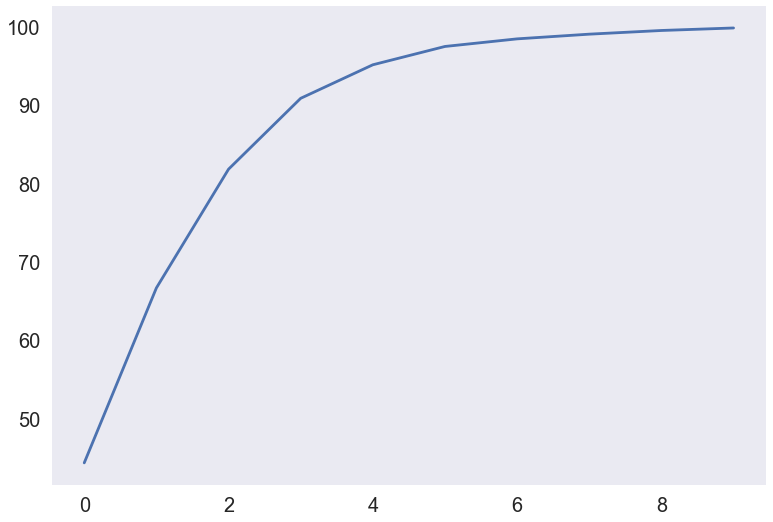

In [217]:
plt.plot(var1)

In [218]:
X1 = pca.fit_transform(var1)

/Users/Radhika/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Radhika/anaconda/lib/python3.6/site-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [219]:
print(X1)

[[ 0.]]


In [61]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_norm)

In [62]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import confusion_matrix

In [63]:
gnb_tai = GaussianNB()

In [64]:
X_train.head()

AMB_TEMP       CH4        CO      NMHC        NO       NO2        O3  \
35  0.963636  0.465686  0.023266  0.641892  0.007527  0.579911  0.948874   
31  0.240041  0.507125  0.012516  0.402145  0.035001  0.217495  0.033859   
26  0.225911  0.488248  0.003432  0.238098  0.013564  0.158777  0.053681   
15  0.890909  0.000000  1.000000  0.000000  1.000000  1.000000  0.325255   
21  0.217178  0.589364  0.003376  0.221992  0.009594  0.160275  0.052945   

        PM10        RH       SO2       THC     WD_HR     PM2_5  WIND_DIREC  
35  0.342754  0.000000  0.005931  0.551451  0.133192  0.633348    0.269457  
31  0.023179  0.748822  0.000422  0.426257  0.209070  0.059683    0.230061  
26  0.040239  0.813977  0.000631  0.331721  0.532056  0.135711    0.555332  
15  0.073643  0.244124  1.000000  0.000000  0.000000  0.015533    0.000000  
21  0.042512  0.897080  0.005335  0.380189  0.236707  0.089016    0.263397

In [65]:
Y_train.head()

35    VERY_UNHEALTHY
31              GOOD
26              GOOD
15         HAZARDOUS
21              GOOD
Name: AQI_cal, dtype: category
Categories (6, object): [GOOD < HAZARDOUS < MODERATE < UNHEALTHY < UNHEALTHY_SG < VERY_UNHEALTHY]

In [66]:
y_pred_NB = gnb_tai.fit(X_norm,Y).predict(X_test)

In [67]:
print("Number of mislabeled points out of a total %d points using Naive-Bayes GaussianNB: %d"
      % (X_norm.shape[0],( Y_test != y_pred_NB).sum()))

Number of mislabeled points out of a total 46 points using Naive-Bayes GaussianNB: 1


In [68]:
print("Prediction Accuracy Naive-Bayes GaussianNB is : %f" 
     % (1 -((Y_test != y_pred_NB).sum()/X_norm.shape[0])))

Prediction Accuracy Naive-Bayes GaussianNB is : 0.978261


In [69]:
cnf_matrix_gnb = confusion_matrix(Y_test, y_pred_NB)

In [70]:
print(cnf_matrix_gnb)

[[3 0 0 0 0]
 [0 5 0 0 0]
 [0 0 2 1 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
mnb_NB = MultinomialNB()

In [73]:
y_pred_mnb = mnb_NB.fit(X_train, Y_train).predict(X_test)

In [74]:
print("Number of mislabeled points out of a total %d points using Naive-Bayes MultinomialNB: %d"
      % (X_train.shape[0],(Y_test != y_pred_mnb).sum()))

Number of mislabeled points out of a total 32 points using Naive-Bayes MultinomialNB: 10


In [ ]:
#applying Knn now

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
X_test_int = X_test.apply(pd.to_numeric)

In [87]:
knn_3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)

In [91]:
print ("Training Score for KNN = 3: %f"
       %(knn_3.score(X_train,Y_train)))

Training Cross-Validation score for Knn = 3: 0.875000


In [93]:
print ("For KNN =3, Score on Test Data = %f"
       %(knn_3.score(X_test,Y_test)))

For KNN =3, Score on Test Data = 0.785714


In [100]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [95]:
model = tree.DecisionTreeClassifier()

In [96]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:
y_pred = model.predict(X_test)

In [104]:
print("Accuracy Score for Decision Tree = %f"
      %(accuracy_score(Y_test,y_pred)))

Accuracy Score for Decision Tree = 0.785714


In [105]:
tree.export_graphviz(model.tree_, out_file='tree.dot',feature_names=X.columns)

In [107]:
from subprocess import call

In [108]:
call(['dot','-T','png','tree.dot','-o','tree.png'])

0

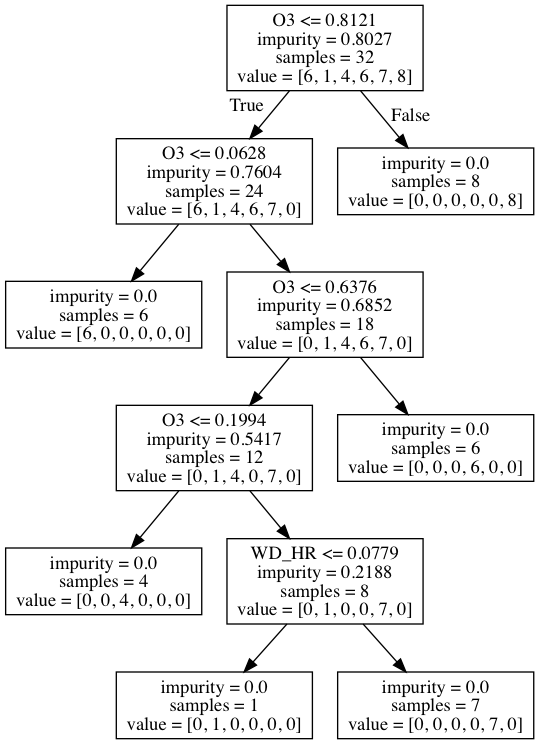

In [116]:
from IPython.display import Image
Image(filename='tree.png')